In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight

import joblib

In [31]:
df=pd.read_parquet('data.parquet')

In [32]:
df.dropna(inplace=True)

In [33]:
# Convert time columns from hmin format to decimal hours
def convert_to_decimal_hours(time):
    hours = time // 100
    minutes = time % 100
    return hours + minutes / 60.0

df['CRS_DEP_TIME_DECIMAL'] = df['CRS_DEP_TIME'].apply(convert_to_decimal_hours)
df['CRS_ARR_TIME_DECIMAL'] = df['CRS_ARR_TIME'].apply(convert_to_decimal_hours)


/tmp/ipykernel_337062/344708835.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crs_dep_delay_ratio, x='CRS_DEP_HOUR', y='DELAY_RATIO', palette='viridis')


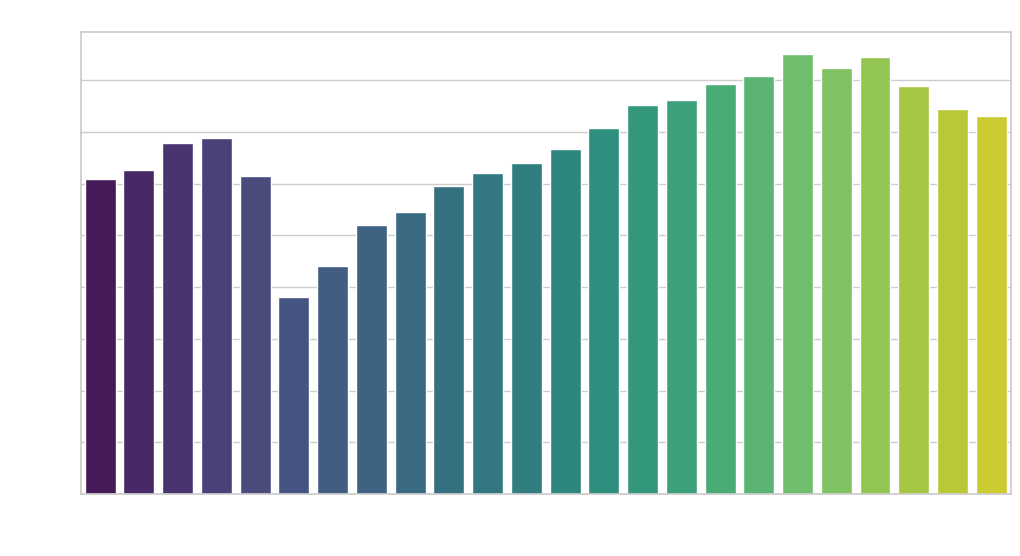

/tmp/ipykernel_337062/344708835.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=arr_time_delay_ratio, x='CRS_ARR_HOUR', y='DELAY_RATIO', palette='viridis')


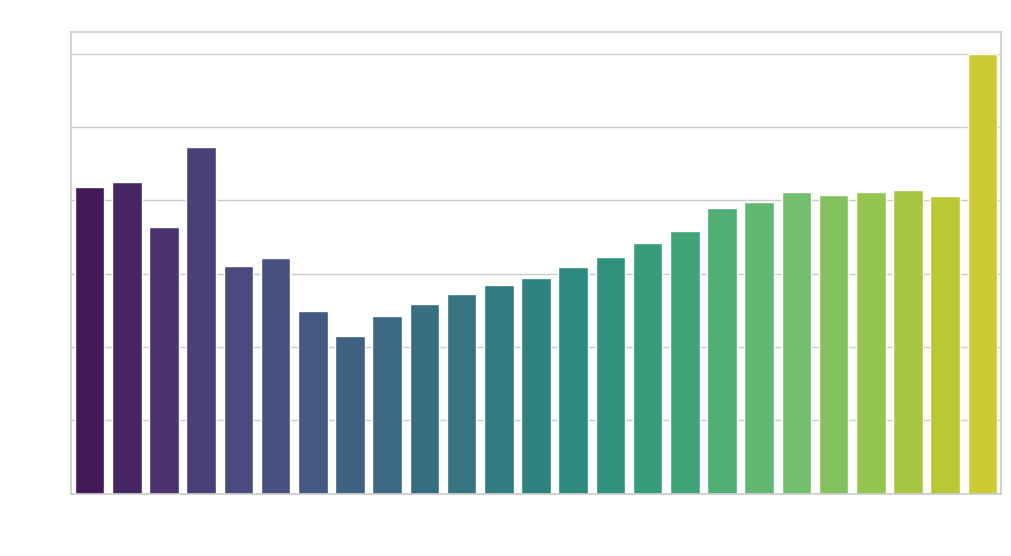

In [35]:


# Fonction pour arrondir les heures décimales à l'heure pleine
def round_to_hour(time_decimal):
    return int(time_decimal)

# Ajouter une colonne avec les heures arrondies
df['CRS_DEP_HOUR'] = df['CRS_DEP_TIME_DECIMAL'].apply(round_to_hour)
df['CRS_ARR_HOUR'] = df['CRS_ARR_TIME_DECIMAL'].apply(round_to_hour)

# Fonction pour calculer le ratio de retard pour chaque heure
def calculate_delay_ratio(df, time_col):
    delay_ratio = df.groupby(time_col)['DELAY'].mean().reset_index()
    delay_ratio.columns = [time_col, 'DELAY_RATIO']
    return delay_ratio

# Calcul du ratio de retard pour les heures arrondies
crs_dep_delay_ratio = calculate_delay_ratio(df, 'CRS_DEP_HOUR')
arr_time_delay_ratio = calculate_delay_ratio(df, 'CRS_ARR_HOUR')

# Paramètres esthétiques pour les graphiques
sns.set(style="whitegrid")

# Configuration de Matplotlib pour utiliser le texte blanc
plt.rcParams.update({
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white'
})

# Graphique en barres pour CRS_DEP_HOUR avec fond transparent et texte blanc
plt.figure(figsize=(12, 6), facecolor='none')
sns.barplot(data=crs_dep_delay_ratio, x='CRS_DEP_HOUR', y='DELAY_RATIO', palette='viridis')
plt.title('Ratio of DELAY by CRS_DEP_HOUR', color='white')
plt.xlabel('CRS_DEP_HOUR', color='white')
plt.ylabel('Ratio of DELAY', color='white')
plt.gca().patch.set_alpha(0)  # Set the transparency for the Axes
plt.savefig('crs_dep_time_delay_ratio.png', transparent=True)  # Save the figure with transparent background
plt.show()

# Graphique en barres pour ARR_HOUR avec fond transparent et texte blanc
plt.figure(figsize=(12, 6), facecolor='none')
sns.barplot(data=arr_time_delay_ratio, x='CRS_ARR_HOUR', y='DELAY_RATIO', palette='viridis')
plt.title('Taux de retards par heure', color='white')
plt.xlabel("Heure d'arrivée prévue", color='white')
plt.ylabel('Taux de retard', color='white')
plt.gca().patch.set_alpha(0)  # Set the transparency for the Axes
plt.savefig('arr_time_delay_ratio.png', transparent=True)  # Save the figure with transparent background
plt.show()


/tmp/ipykernel_337062/3432416910.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_of_week_delay_ratio, x='DAY_OF_WEEK', y='DELAY_RATIO', palette='viridis')


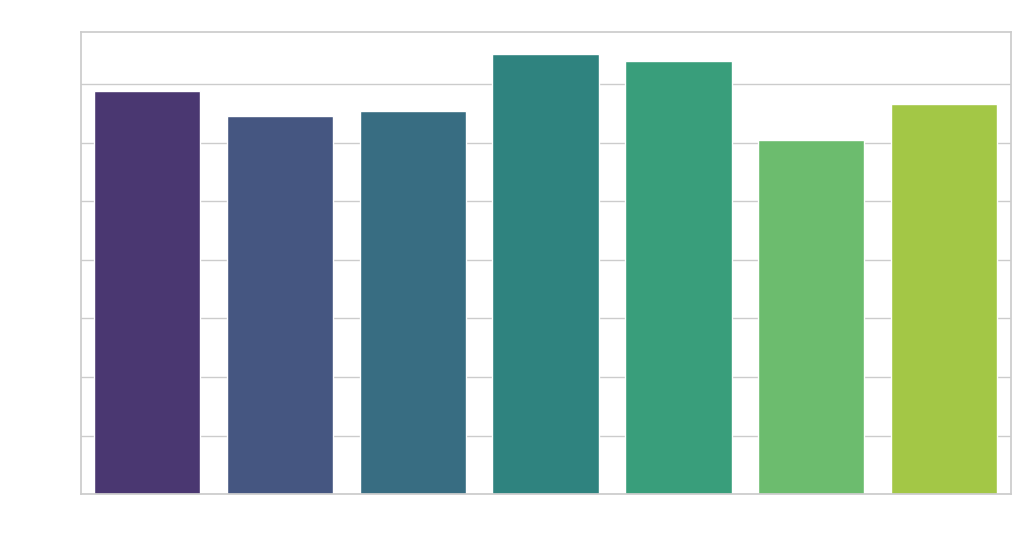

/tmp/ipykernel_337062/3432416910.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_of_month_delay_ratio, x='DAY_OF_MONTH', y='DELAY_RATIO', palette='viridis')


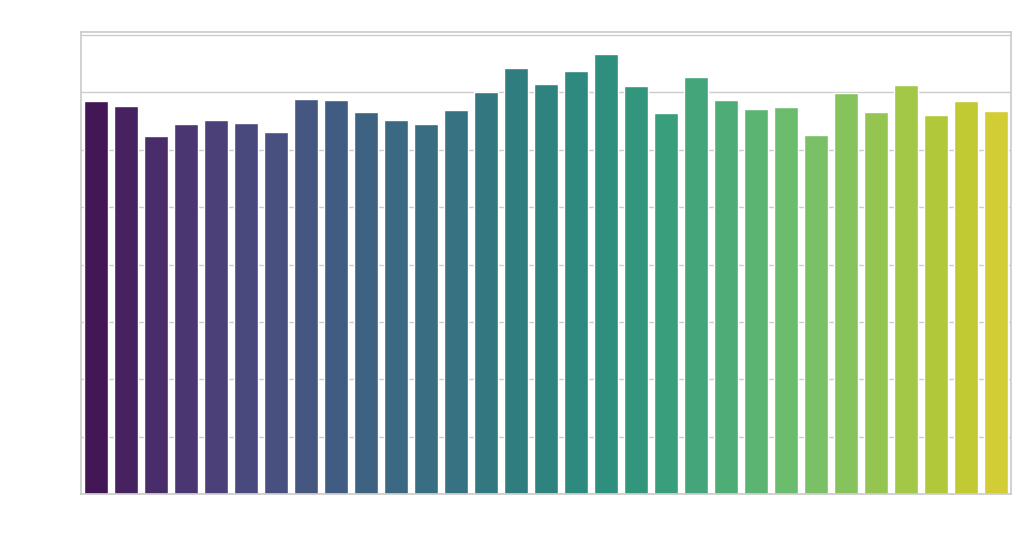

/tmp/ipykernel_337062/3432416910.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_delay_ratio, x='MONTH', y='DELAY_RATIO', palette='viridis')


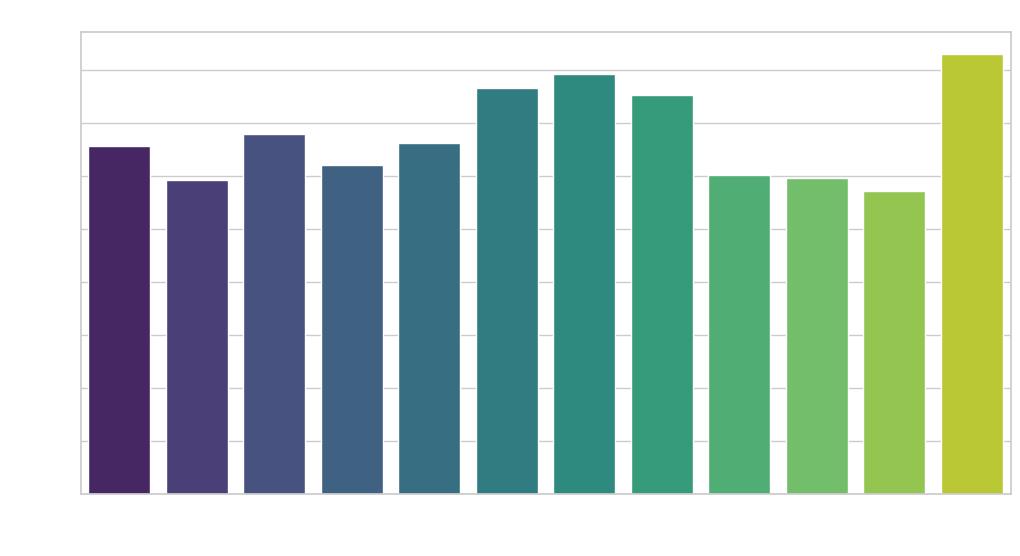

In [18]:

def calculate_delay_ratio(df, time_col):
    delay_ratio = df.groupby(time_col)['DELAY'].mean().reset_index()
    delay_ratio.columns = [time_col, 'DELAY_RATIO']
    return delay_ratio

# Calcul du ratio de retard pour chaque colonne
crs_dep_delay_ratio = calculate_delay_ratio(df, 'CRS_DEP_HOUR')
arr_time_delay_ratio = calculate_delay_ratio(df, 'CRS_ARR_HOUR')
day_of_week_delay_ratio = calculate_delay_ratio(df, 'DAY_OF_WEEK')
day_of_month_delay_ratio = calculate_delay_ratio(df, 'DAY_OF_MONTH')
month_delay_ratio = calculate_delay_ratio(df, 'MONTH')

# Paramètres esthétiques pour les graphiques
sns.set(style="whitegrid")

# Configuration de Matplotlib pour utiliser le texte blanc
plt.rcParams.update({
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white'
})





# Graphique en barres pour DAY_OF_WEEK avec fond transparent et texte blanc
plt.figure(figsize=(12, 6), facecolor='none')
sns.barplot(data=day_of_week_delay_ratio, x='DAY_OF_WEEK', y='DELAY_RATIO', palette='viridis')
plt.title('Taux de retard par jour de la semaine', color='white')
plt.xlabel('Jour de la semaine', color='white')
plt.ylabel('Taux de retard', color='white')
plt.gca().patch.set_alpha(0)  # Set the transparency for the Axes
plt.savefig('day_of_week_delay_ratio.png', transparent=True)  # Save the figure with transparent background
plt.show()

# Graphique en barres pour DAY_OF_MONTH avec fond transparent et texte blanc
plt.figure(figsize=(12, 6), facecolor='none')
sns.barplot(data=day_of_month_delay_ratio, x='DAY_OF_MONTH', y='DELAY_RATIO', palette='viridis')
plt.title('Taux de retard par jour du mois', color='white')
plt.xlabel('Jour du mois', color='white')
plt.ylabel('Taux de retard', color='white')
plt.gca().patch.set_alpha(0)  # Set the transparency for the Axes
plt.savefig('day_of_month_delay_ratio.png', transparent=True)  # Save the figure with transparent background
plt.show()

# Graphique en barres pour MONTH avec fond transparent et texte blanc
plt.figure(figsize=(12, 6), facecolor='none')
sns.barplot(data=month_delay_ratio, x='MONTH', y='DELAY_RATIO', palette='viridis')
plt.title('Taux de retard par mois', color='white')
plt.xlabel('MOIS', color='white')
plt.ylabel('Taux de retard par mois', color='white')
plt.gca().patch.set_alpha(0)  # Set the transparency for the Axes
plt.savefig('month_delay_ratio.png', transparent=True)  # Save the figure with transparent background
plt.show()


/tmp/ipykernel_337062/3031869417.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_origin_delay, x='ORIGIN', y='DELAY_RATIO', palette='viridis')


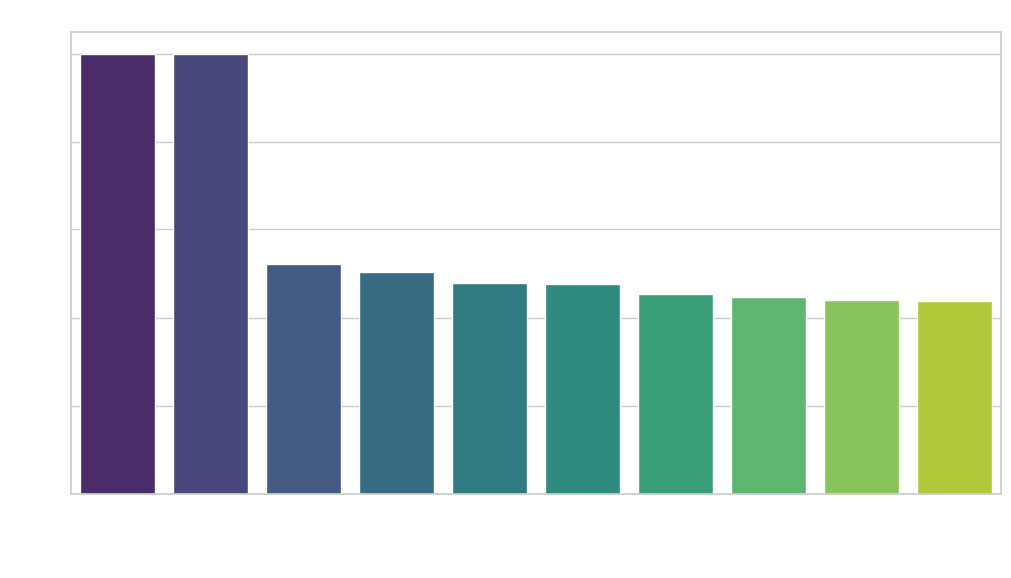

/tmp/ipykernel_337062/3031869417.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_origin_delay, x='ORIGIN', y='DELAY_RATIO', palette='viridis')


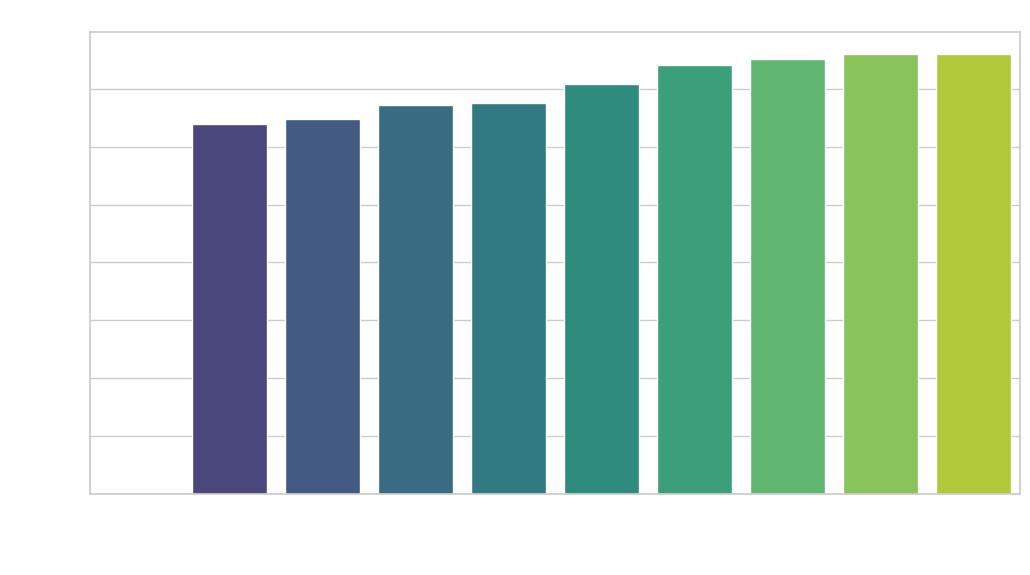

/tmp/ipykernel_337062/3031869417.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_dest_delay, x='DEST', y='DELAY_RATIO', palette='viridis')


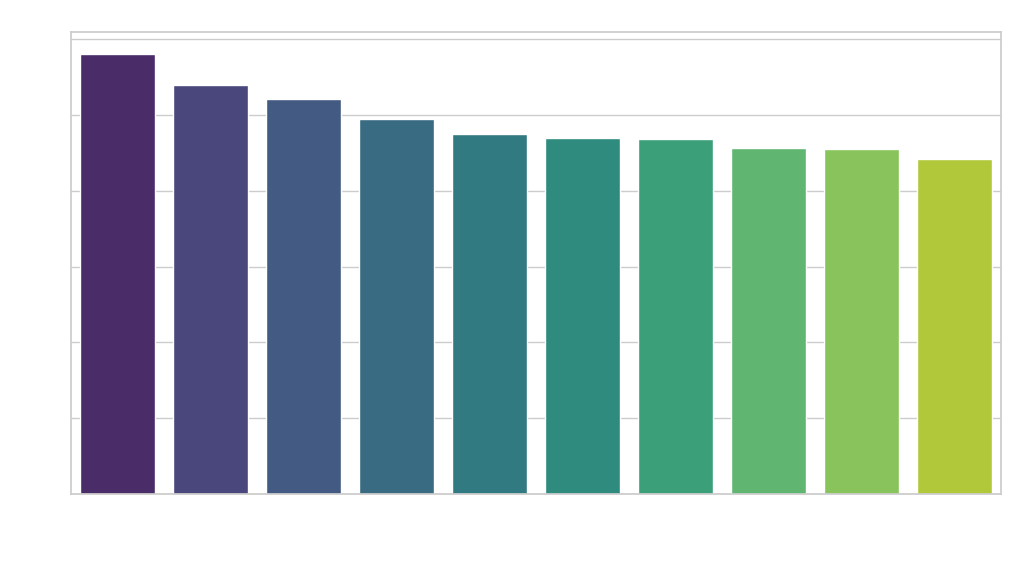

/tmp/ipykernel_337062/3031869417.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_dest_delay, x='DEST', y='DELAY_RATIO', palette='viridis')


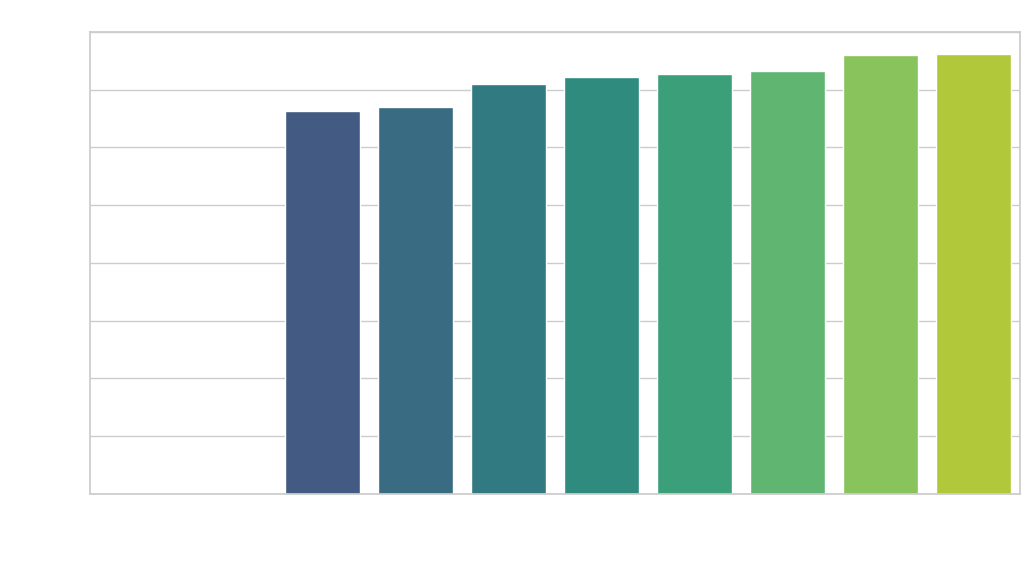

In [19]:

# Fonction pour calculer le ratio de retard pour une colonne donnée
def calculate_delay_ratio(df, col):
    delay_ratio = df.groupby(col)['DELAY'].mean().reset_index()
    delay_ratio.columns = [col, 'DELAY_RATIO']
    return delay_ratio

# Calcul du ratio de retard pour les aéroports de départ et d'arrivée
origin_delay_ratio = calculate_delay_ratio(df, 'ORIGIN')
dest_delay_ratio = calculate_delay_ratio(df, 'DEST')

# Extraction du top 10 des aéroports avec le plus gros ratio de retard (départ)
top_10_origin_delay = origin_delay_ratio.nlargest(10, 'DELAY_RATIO')
bottom_10_origin_delay = origin_delay_ratio.nsmallest(10, 'DELAY_RATIO')

# Extraction du top 10 des aéroports avec le plus gros ratio de retard (arrivée)
top_10_dest_delay = dest_delay_ratio.nlargest(10, 'DELAY_RATIO')
bottom_10_dest_delay = dest_delay_ratio.nsmallest(10, 'DELAY_RATIO')

# Paramètres esthétiques pour les graphiques
sns.set(style="whitegrid")

# Configuration de Matplotlib pour utiliser le texte blanc
plt.rcParams.update({
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white'
})

# Graphique en barres pour le top 10 des aéroports de départ avec le plus gros ratio de retard
plt.figure(figsize=(12, 6), facecolor='none')
sns.barplot(data=top_10_origin_delay, x='ORIGIN', y='DELAY_RATIO', palette='viridis')
plt.title('Top 10 Airports with Highest Delay Ratio (Departure)', color='white')
plt.xlabel('Airport', color='white')
plt.ylabel('Delay Ratio', color='white')
plt.gca().patch.set_alpha(0)  # Set the transparency for the Axes
plt.xticks(rotation=90)
plt.savefig('top_10_origin_delay.png', transparent=True)  # Save the figure with transparent background
plt.show()

# Graphique en barres pour le top 10 des aéroports de départ avec le plus petit ratio de retard
plt.figure(figsize=(12, 6), facecolor='none')
sns.barplot(data=bottom_10_origin_delay, x='ORIGIN', y='DELAY_RATIO', palette='viridis')
plt.title('Top 10 Airports with Lowest Delay Ratio (Departure)', color='white')
plt.xlabel('Airport', color='white')
plt.ylabel('Delay Ratio', color='white')
plt.gca().patch.set_alpha(0)  # Set the transparency for the Axes
plt.xticks(rotation=90)
plt.savefig('bottom_10_origin_delay.png', transparent=True)  # Save the figure with transparent background
plt.show()

# Graphique en barres pour le top 10 des aéroports d'arrivée avec le plus gros ratio de retard
plt.figure(figsize=(12, 6), facecolor='none')
sns.barplot(data=top_10_dest_delay, x='DEST', y='DELAY_RATIO', palette='viridis')
plt.title('Top 10 Airports with Highest Delay Ratio (Arrival)', color='white')
plt.xlabel('Airport', color='white')
plt.ylabel('Delay Ratio', color='white')
plt.gca().patch.set_alpha(0)  # Set the transparency for the Axes
plt.xticks(rotation=90)
plt.savefig('top_10_dest_delay.png', transparent=True)  # Save the figure with transparent background
plt.show()

# Graphique en barres pour le top 10 des aéroports d'arrivée avec le plus petit ratio de retard
plt.figure(figsize=(12, 6), facecolor='none')
sns.barplot(data=bottom_10_dest_delay, x='DEST', y='DELAY_RATIO', palette='viridis')
plt.title('Top 10 Airports with Lowest Delay Ratio (Arrival)', color='white')
plt.xlabel('Airport', color='white')
plt.ylabel('Delay Ratio', color='white')
plt.gca().patch.set_alpha(0)  # Set the transparency for the Axes
plt.xticks(rotation=90)
plt.savefig('bottom_10_dest_delay.png', transparent=True)  # Save the figure with transparent background
plt.show()


/tmp/ipykernel_337062/3569293621.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x_col, y=y_col, palette=palette, ax=ax)


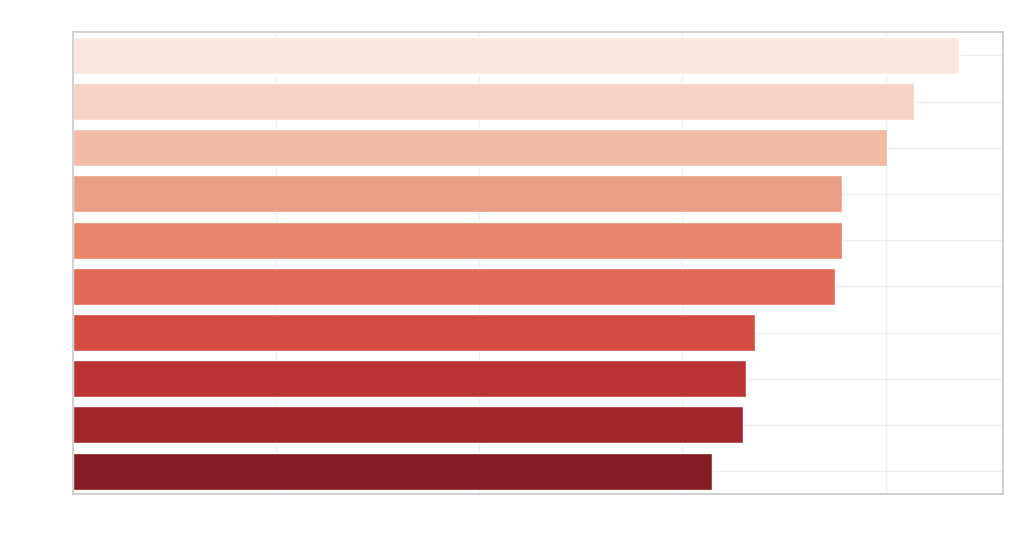

/tmp/ipykernel_337062/3569293621.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x_col, y=y_col, palette=palette, ax=ax)


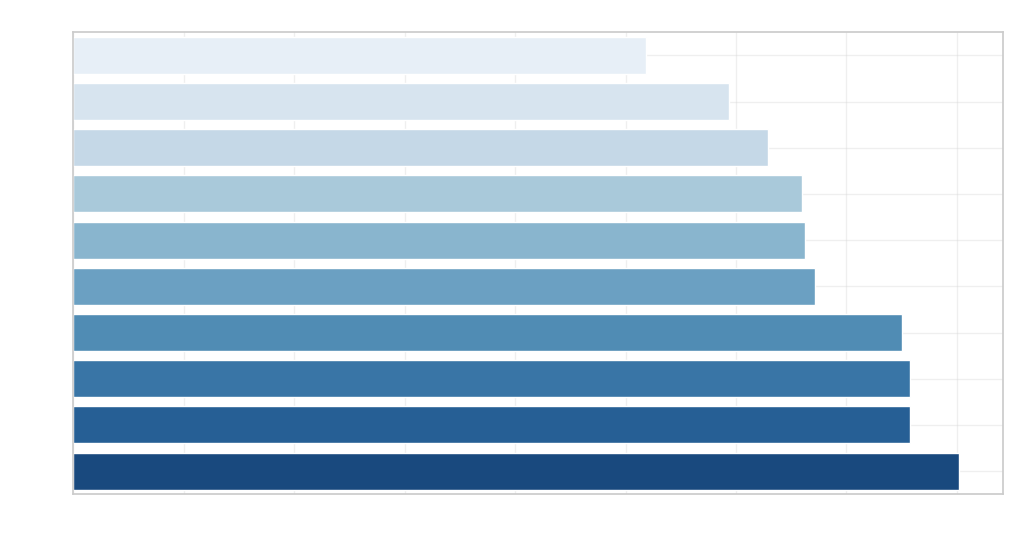

In [28]:

# Fonction pour calculer le ratio de retard pour une colonne donnée
def calculate_delay_ratio(df, col):
    delay_ratio = df.groupby(col)['DELAY'].mean().reset_index()
    delay_ratio.columns = [col, 'DELAY_RATIO']
    return delay_ratio

# Calcul du ratio de retard pour les aéroports de départ et d'arrivée
carrier_delay_ratio = calculate_delay_ratio(df, 'CARRIER')

# Extraction du top 10 des aéroports avec le plus gros ratio de retard (départ)
top_10_carrier_delay = carrier_delay_ratio.nlargest(10, 'DELAY_RATIO')
bottom_10_carrier_delay = carrier_delay_ratio.nsmallest(10, 'DELAY_RATIO')


# Paramètres esthétiques pour les graphiques
sns.set(style="whitegrid")

# Configuration de Matplotlib pour utiliser le texte blanc
plt.rcParams.update({
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white'
})

# Fonction pour créer un barplot horizontal
def create_bar_plot(data, x_col, y_col, title, xlabel, ylabel, palette):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=data, x=x_col, y=y_col, palette=palette, ax=ax)
    ax.set_title(title, color='white')
    ax.set_xlabel(xlabel, color='white')
    ax.set_ylabel(ylabel, color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    fig.patch.set_facecolor('none')  # Fond transparent pour la figure
    fig.patch.set_alpha(0)            # Transparence de la figure
    ax.set_facecolor('none')          # Fond transparent pour l'axe
    plt.grid(True, alpha=0.3)
    plt.show()

# Graphique en barres horizontales pour le top 10 des aéroports de départ avec le plus gros ratio de retard
create_bar_plot(top_10_carrier_delay, 'DELAY_RATIO', 'CARRIER', 'Top 10 des Compagnies les plus en retard ', 'Taux de retard', 'Compagnie', 'Reds')

# Graphique en barres horizontales pour le top 10 des aéroports de départ avec le plus petit ratio de retard
create_bar_plot(bottom_10_carrier_delay, 'DELAY_RATIO', 'CARRIER', 'Top 10 des Compagnies les plus ponctuelles', 'Taux de Retard', 'Compagnie', 'Blues')


In [37]:


# Définition des caractéristiques
features = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER', 'ORIGIN', 'DEST', 'DISTANCE', 'CRS_DEP_TIME_DECIMAL', 'CRS_ARR_TIME_DECIMAL']
X = df[features]
y = df['DELAY']

# Sélection des caractéristiques catégorielles et numériques
categorical_features = ['CARRIER', 'ORIGIN', 'DEST']
numeric_features = ['DISTANCE', 'CRS_DEP_TIME_DECIMAL', 'CRS_ARR_TIME_DECIMAL', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK']

# Création du transformateur pour les caractéristiques catégorielles (OneHotEncoder)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Création du transformateur pour les caractéristiques numériques (StandardScaler)
numeric_transformer = StandardScaler()

# Création du préprocesseur avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)])

# Création du pipeline avec le préprocesseur et le modèle
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression(max_iter=1000, solver='liblinear'))])

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du pipeline
pipeline.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Évaluation du modèle en utilisant MSE et MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Sauvegarde du pipeline
joblib.dump(pipeline, 'modele.joblib')


Mean Squared Error (MSE): 0.3373020753405057
Mean Absolute Error (MAE): 0.3373020753405057


['modele.joblib']

Accuracy: 0.6626979246594943
Confusion Matrix:
 [[1058786   40945]
 [ 521290   45838]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.96      0.79   1099731
           1       0.53      0.08      0.14    567128

    accuracy                           0.66   1666859
   macro avg       0.60      0.52      0.47   1666859
weighted avg       0.62      0.66      0.57   1666859

ROC AUC Score: 0.6220673586558746


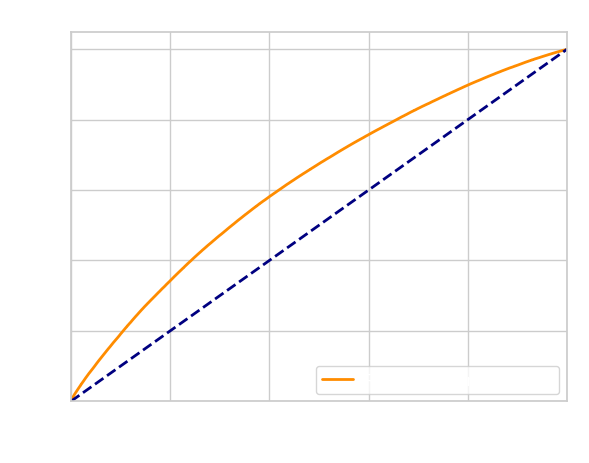

In [38]:

# Prédiction sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Prédiction des probabilités sur l'ensemble de test
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Évaluation du modèle en utilisant des métriques de classification
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Si vous souhaitez visualiser la courbe ROC
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [39]:

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Extraction des valeurs TP, FP, FN, TN
TN, FP, FN, TP = conf_matrix.ravel()

# Calcul de la Précision (PPV)
precision = TP / (TP + FP)

# Calcul de la Valeur prédictive négative (NPV)
npv = TN / (TN + FN)

print("Précision (PPV):", precision)
print("Valeur prédictive négative (NPV):", npv)

Précision (PPV): 0.5281910051507783
Valeur prédictive négative (NPV): 0.67008548955873
